In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

import plotly.express as px 
import plotly.graph_objects as go 
sns.set_theme(style='whitegrid')

In [5]:
df = pd.read_csv('data/online.csv')

In [6]:
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  output                      388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [14]:
df.rename(columns={'Unnamed: 12':'output'},inplace=True)

<AxesSubplot:title={'center':'online food order decisions based on age'}, xlabel='Age', ylabel='Count'>

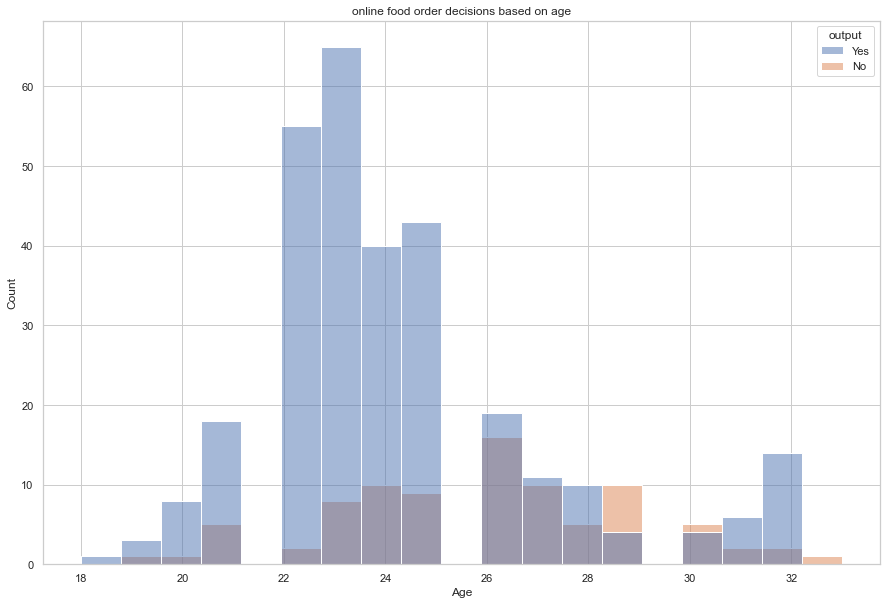

In [17]:
plt.figure(figsize=(15,10))
plt.title("online food order decisions based on age")
sns.histplot(x='Age',hue='output',data=df )

We can see that the age group of 22-25 ordered the food often again. It also means this age group is the target of online food delivery companies. Now let’s have a look at the online food order decisions based on the size of the family of the customer:

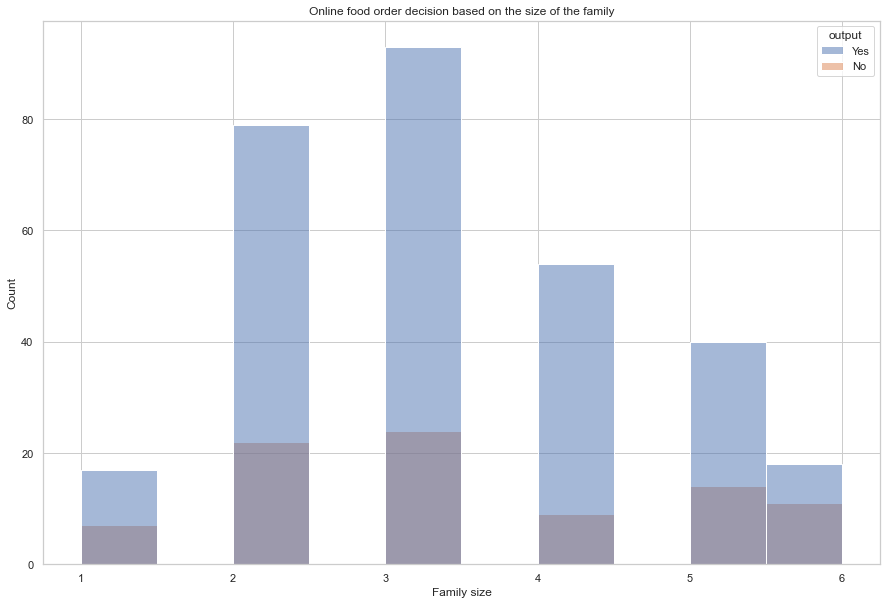

In [19]:
plt.figure(figsize=(15,10))
plt.title("Online food order decision based on the size of the family")
sns.histplot(x='Family size',hue='output',data=df)
plt.show()

Families with 2 and 3 members are ordering food often. These can be roommates, couples, or a family of three.

In [23]:
# Letes create a dataset of all the customers who ordered the food again:
buying_again_data = df.query('output=="Yes"')
buying_again_data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,output
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [31]:
gender = buying_again_data['Gender'].value_counts()
label = gender.index
counts=gender.values
color=['gold','lightgreen']

fig = go.Figure(data=[go.Pie(labels=label,values=counts)])
fig.update_layout(title_text="who orders food online More : male vs female")
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=color, line=dict(color='black', width=3)))
fig.show()

According to the dataset, male customers are ordering more compared the females. Now let’s have a look at the marital status of the customers who ordered again:

In [33]:
gender = buying_again_data['Marital Status'].value_counts()
label = gender.index
counts=gender.values
color=['gold','lightgreen']

fig = go.Figure(data=[go.Pie(labels=label,values=counts)])
fig.update_layout(title_text="who orders food online More : married vs unmarried")
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=color, line=dict(color='black', width=3)))
fig.show()

According to the above figure, 76.1% of the frequent customers are singles. Now let’s have a look at what’s the income group of the customers who ordered the food again:

In [35]:
gender = buying_again_data['Monthly Income'].value_counts()
label = gender.index
counts=gender.values
color=['gold','lightgreen']

fig = go.Figure(data=[go.Pie(labels=label,values=counts)])
fig.update_layout(title_text="who orders food online More :")
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=color, line=dict(color='black', width=3)))
fig.show()

According to the above figure, 54% of the customers don’t fall under any income group. They can be housewives or students.

Now let’s prepare the data for the task of training a machine learning model. Here I will convert all the categorical features into numerical values:

In [36]:
data = df.copy()

In [37]:
data["Gender"] = data["Gender"].map({"Male": 1, "Female": 0})
data["Marital Status"] = data["Marital Status"].map({"Married": 2, 
                                                     "Single": 1, 
                                                     "Prefer not to say": 0})
data["Occupation"] = data["Occupation"].map({"Student": 1, 
                                             "Employee": 2, 
                                             "Self Employeed": 3, 
                                             "House wife": 4})
data["Educational Qualifications"] = data["Educational Qualifications"].map({"Graduate": 1, 
                                                                             "Post Graduate": 2, 
                                                                             "Ph.D": 3, "School": 4, 
                                                                             "Uneducated": 5})
data["Monthly Income"] = data["Monthly Income"].map({"No Income": 0, 
                                                     "25001 to 50000": 5000, 
                                                     "More than 50000": 7000, 
                                                     "10001 to 25000": 25000, 
                                                     "Below Rs.10000": 10000})
data["Feedback"] = data["Feedback"].map({"Positive": 1, "Negative ": 0})
print(data.head())

   Age  Gender  Marital Status  Occupation  Monthly Income  \
0   20       0               1           1               0   
1   24       0               1           1           10000   
2   22       1               1           1           10000   
3   22       0               1           1               0   
4   22       1               1           1           10000   

   Educational Qualifications  Family size  latitude  longitude  Pin code  \
0                           2            4   12.9766    77.5993    560001   
1                           1            3   12.9770    77.5773    560009   
2                           2            3   12.9551    77.6593    560017   
3                           1            6   12.9473    77.5616    560019   
4                           2            4   12.9850    77.5533    560010   

  Output  Feedback output  
0    Yes         1    Yes  
1    Yes         1    Yes  
2    Yes         0    Yes  
3    Yes         1    Yes  
4    Yes         1    Ye

In [38]:
#splitting data
from sklearn.model_selection import train_test_split
x = np.array(data[["Age", "Gender", "Marital Status", "Occupation", 
                   "Monthly Income", "Educational Qualifications", 
                   "Family size", "Pin code", "Feedback"]])
y = np.array(data[["Output"]])

In [39]:
# training a machine learning model
from sklearn.ensemble import RandomForestClassifier
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.10, 
                                                random_state=42)
model = RandomForestClassifier()
model.fit(xtrain, ytrain)
print(model.score(xtest, ytest))

<ipython-input-39-97d0e0a942d3>:7: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.9487179487179487


In [41]:
print("Enter Customer Details to Predict If the Customer Will Order Again")
a = int(input("Enter the Age of the Customer: "))
b = int(input("Enter the Gender of the Customer (1 = Male, 0 = Female): "))
c = int(input("Marital Status of the Customer (1 = Single, 2 = Married, 3 = Not Revealed): "))
d = int(input("Occupation of the Customer (Student = 1, Employee = 2, Self Employeed = 3, House wife = 4): "))
e = int(input("Monthly Income: "))
f = int(input("Educational Qualification (Graduate = 1, Post Graduate = 2, Ph.D = 3, School = 4, Uneducated = 5): "))
g = int(input("Family Size: "))
h = int(input("Pin Code: "))
i = int(input("Review of the Last Order (1 = Positive, 0 = Negative): "))
features = np.array([[a, b, c, d, e, f, g, h, i]])
print("Finding if the customer will order again: ", model.predict(features))

Enter Customer Details to Predict If the Customer Will Order Again
Finding if the customer will order again:  ['Yes']


# Summary
So this is how you can predict whether a customer will order food online again or not. The food order prediction system is one of the useful techniques food delivery companies can use to make the entire delivery process fast. I hope you liked this article on Online Food Delivery Prediction with Machine Learning. Feel free to ask valuable questions in the comments section below.